## Vertical velocity profile from 5S to 16S 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm 
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [2]:
ds = xr.open_dataset('../../NHCS/hincast_1980-2015/croco_avg_Y1980M01.nc', 
                     chunks = {'time':1}).w
ds

<xarray.DataArray 'w' (time: 1, s_rho: 32, eta_rho: 542, xi_rho: 602)> Size: 42MB
dask.array<open_dataset-w, shape=(1, 32, 542, 602), dtype=float32, chunksize=(1, 32, 542, 602), chunktype=numpy.ndarray>
Coordinates:
  * xi_rho   (xi_rho) float64 5kB 1.0 2.0 3.0 4.0 ... 599.0 600.0 601.0 602.0
  * eta_rho  (eta_rho) float64 4kB 1.0 2.0 3.0 4.0 ... 539.0 540.0 541.0 542.0
  * s_rho    (s_rho) float64 256B -0.9844 -0.9531 -0.9219 ... -0.04688 -0.01562
    lon_rho  (eta_rho, xi_rho) float64 3MB dask.array<chunksize=(542, 602), meta=np.ndarray>
    lat_rho  (eta_rho, xi_rho) float64 3MB dask.array<chunksize=(542, 602), meta=np.ndarray>
  * time     (time) float32 4B 1.339e+06
Attributes:
    long_name:      averaged vertical momentum component
    units:          meter second-1
    field:          w-velocity, scalar, series
    standard_name:  upward_sea_water_velocity

In [3]:
WMLD = loadmat("../../NHCS/Processed/W_perfil_5_16.mat")
print(WMLD.keys())

dict_keys(['__header__', '__version__', '__globals__', 'wnew', 'depths'])


In [11]:
wmld_ds = xr.Dataset(
    data_vars={
        'wmld': (("time", "depth"), WMLD['wnew'].transpose(1, 0)),
    },
    coords = {
        'depth':WMLD['depths'][0,:],
        'time':time
}
)

wmld_ds

<xarray.Dataset> Size: 351kB
Dimensions:  (time: 432, depth: 201)
Coordinates:
  * depth    (depth) int16 402B 0 -5 -10 -15 -20 ... -980 -985 -990 -995 -1000
  * time     (time) datetime64[ns] 3kB 1980-01-31 1980-02-29 ... 2015-12-31
Data variables:
    wmld     (time, depth) float32 347kB 1.646e-07 5.371e-06 ... -1.702e-05

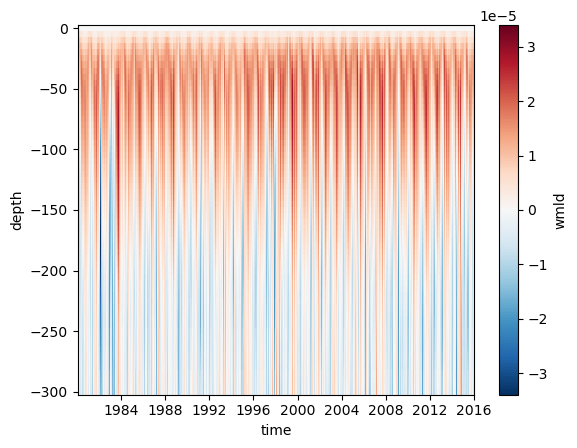

In [23]:
wmld_ds.sel(depth=slice(0,-300)).wmld.plot(y='depth')

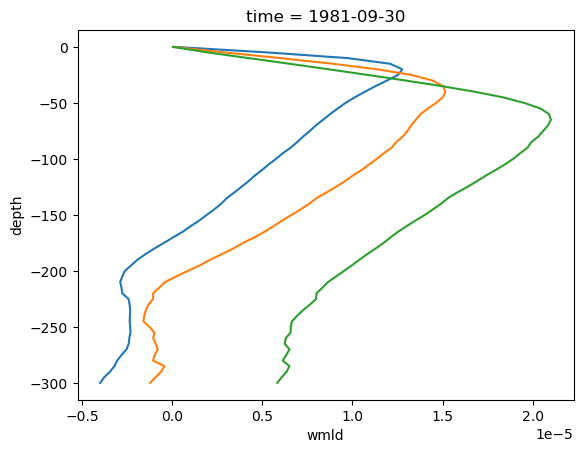

In [29]:
wmld_ds.isel(time=0).sel(depth=slice(0,-300)).wmld.plot(y='depth')
wmld_ds.isel(time=10).sel(depth=slice(0,-300)).wmld.plot(y='depth')
wmld_ds.isel(time=20).sel(depth=slice(0,-300)).wmld.plot(y='depth')